## Projeto final de análise do conjunto de dados sobre incumprimento de cartões de crédito

## Introdução

O objetivo deste projeto é analisar a Base de Dados de Incumprimento de Cartões de Crédito disponibilizada pelo OpenML de forma a prever incumprimentos. 


Esta análise tem como objetivo ajudar as instituições financeiras a prever o comportamento do incumprimento, permitindo uma melhor gestão do risco e tomada de decisões estratégicas.

## 1. Importando bibliotecas

Para manipular e analisar os dados, certifiquei-me de que todas as bibliotecas Python essenciais estavam instaladas:

In [1]:
# Bibliotecas relacionadas com o conjunto de dados
import numpy as np # operações numéricas
import pandas as pd # operações relacionadas com conjuntos de dados
import matplotlib.pyplot as plt # visualização de características
import seaborn as sns # visualizações mais apelativas


In [2]:
# Bibliotecas relacionadas com machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV # divisão do conjunto de dados
from sklearn.linear_model import LogisticRegression # modelo de Regressão Logística
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, roc_curve, auc # métricas de desempenho
from sklearn.feature_selection import RFE # seleção de características
from sklearn.preprocessing import StandardScaler, MinMaxScaler # normalização dos valores do conjunto de dados
from imblearn.combine import SMOTEENN # abordagem para equilibrar conjuntos de dados
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier 
from sklearn.decomposition import PCA # PCA para redução de dimensionalidade
from imblearn.over_sampling import SMOTE # abordagem para equilibrar conjuntos de dados



In [3]:
# Bibliotecas TensorFlow para redes neuronais convolucionais
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

from sklearn.utils.class_weight import compute_class_weight


In [4]:
# Remover os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Dados do conjunto de dados

Em primeiro lugar, procurei o conjunto de dados de incumprimento dos cartões de crédito no OpenML e descarreguei os dados para análise posterior. Escolhi o formato CSV que foi recomendado no documento final de apoio ao projeto para facilitar a utilização de bibliotecas como a pandas.

### Passos efectuados

1. Aceder ao sítio Web [OpenML] (https://www.openml.org/).
2. Navegar para o conjunto de dados **default-of-credit-card-clients**.
3. Descarregar o conjunto de dados em formato CSV.

Após o download, os dados foram carregados utilizando a biblioteca pandas. Comecei por fazer uma exploração inicial para compreender a estrutura do conjunto de dados, verificar os tipos de dados e identificar possíveis valores em falta.

## 3. Pré-processamento


#### 1. Carregar o conjunto de dados


In [5]:
def load_dataset(file_path):
    """
    Carrega o conjunto de dados de um arquivo CSV para um DataFrame do Pandas.

    Args:
        file_path (str): O caminho do arquivo CSV.

    Retorna:
        pd.DataFrame: O conjunto de dados carregado como um DataFrame do Pandas.
    """
    try:
        data = pd.read_csv(file_path)
        return data
    except FileNotFoundError:
        print(f"Erro: O arquivo no caminho {file_path} não foi encontrado.")
    except Exception as e:
        print(f"Ocorreu um erro: {e}")

# Exemplo de uso
data = load_dataset('credit_card_default.csv')

#### 2. Verificar a Dimensão do Conjunto de Dados

In [6]:
def check_dataset_shape(data):
    """
    Verifica a dimensão do conjunto de dados.

    Args:
        data (pd.DataFrame): O conjunto de dados a ser analisado.

    Retorna:
        tuple: A dimensão do conjunto de dados no formato (linhas, colunas).
    """
    try:
        shape = data.shape
        print(f"A dimensão do conjunto de dados é: {shape}")
        return shape
    except AttributeError:
        print("Erro: O objeto fornecido não é um DataFrame válido.")

# Exemplo de uso
dataset_shape = check_dataset_shape(data)

A dimensão do conjunto de dados é: (30000, 24)


#### 3. Resumo do conjunto de dados

In [7]:

def preview_dataset(data, rows=2):
    """
    Exibe as primeiras linhas, uma amostra aleatória, e as últimas linhas do conjunto de dados.

    Args:
        data (pd.DataFrame): O conjunto de dados a ser visualizado.
        rows (int): O número de linhas a serem exibidas para as primeiras e últimas linhas. 
                    O padrão é 2.

    Retorna:
        None
    """
    try:
        # Exibe as primeiras linhas
        print("Primeiras linhas do conjunto de dados:")
        print(data.head(rows))

        # Exibe uma amostra aleatória
        print("\nAmostra aleatória do conjunto de dados:")
        print(data.sample())

        # Exibe as últimas linhas
        print("\nÚltimas linhas do conjunto de dados:")
        print(data.tail(rows))

    except AttributeError:
        print("Erro: O objeto fornecido não é um DataFrame válido.")

# Exemplo de uso
preview_dataset(data)

Primeiras linhas do conjunto de dados:
         x1  x2  x3  x4  x5   x6   x7   x8   x9  x10  ...     x15     x16  \
0   20000.0   2   2   1  24  2.0  2.0 -1.0 -1.0 -2.0  ...     0.0     0.0   
1  120000.0   2   2   2  26 -1.0  2.0  0.0  0.0  0.0  ...  3272.0  3455.0   

      x17  x18     x19     x20     x21  x22     x23  y  
0     0.0  0.0   689.0     0.0     0.0  0.0     0.0  1  
1  3261.0  0.0  1000.0  1000.0  1000.0  0.0  2000.0  1  

[2 rows x 24 columns]

Amostra aleatória do conjunto de dados:
            x1  x2  x3  x4  x5   x6   x7   x8   x9  x10  ...   x15   x16  \
8584  360000.0   1   2   1  49  1.0 -2.0 -1.0 -1.0 -2.0  ... -41.0 -41.0   

       x17  x18     x19  x20  x21  x22  x23  y  
8584 -41.0  0.0  8209.0  0.0  0.0  0.0  0.0  1  

[1 rows x 24 columns]

Últimas linhas do conjunto de dados:
            x1  x2  x3  x4  x5   x6   x7   x8   x9  x10  ...      x15  \
29998  80000.0   1   3   1  41  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
29999  50000.0   1   2   1  46  0.0 

#### 4. Verificação de valores em falta

In [8]:
def check_missing_values(data):
    """
    Verifica se há valores em falta no conjunto de dados.

    Args:
        data (pd.DataFrame): O conjunto de dados a ser analisado.

    Retorna:
        pd.Series: Uma série com a contagem de valores em falta para cada coluna.
    """
    try:
        missing_values = data.isna().sum()
        print("Valores em falta por coluna:")
        print(missing_values)
        if missing_values.sum() == 0:
            print("\nNão há valores em falta no conjunto de dados.")
        else:
            print("\nExistem valores em falta no conjunto de dados.")
        return missing_values
    except AttributeError:
        print("Erro: O objeto fornecido não é um DataFrame válido.")

# Exemplo de uso
missing_values = check_missing_values(data)

Valores em falta por coluna:
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
y      0
dtype: int64

Não há valores em falta no conjunto de dados.


#### 5. Descrever o conjunto de dados

In [9]:
def dataset_summary(data):
    """
    Exibe o resumo estatístico do conjunto de dados.

    Args:
        data (pd.DataFrame): O conjunto de dados a ser analisado.

    Retorna:
        pd.DataFrame: O resumo estatístico do conjunto de dados.
    """
    try:
        summary = data.describe()
        print("Resumo estatístico do conjunto de dados:")
        print(summary)
        return summary
    except AttributeError:
        print("Erro: O objeto fornecido não é um DataFrame válido.")

# Exemplo de uso
summary = dataset_summary(data)

Resumo estatístico do conjunto de dados:
                   x1            x2            x3            x4            x5  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

                 x6            x7            x8            x9           x10  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.26

#### 6. Inspecionar conjunto de dados

In [10]:
def inspect_dataset(data):
    """
    Inspeciona o conjunto de dados, exibindo as primeiras linhas, os nomes das colunas
    e o tipo do objeto.

    Args:
        data (pd.DataFrame): O conjunto de dados a ser inspecionado.

    Retorna:
        None
    """
    try:
        # Exibir as primeiras linhas do conjunto de dados
        print("Primeiras linhas do conjunto de dados:")
        print(data.head(), "\n")

        # Exibir os nomes das colunas
        print("Nomes das colunas do conjunto de dados:")
        print(data.columns, "\n")

        # Exibir o tipo do objeto
        print("Tipo do objeto:")
        print(type(data))
    except AttributeError:
        print("Erro: O objeto fornecido não é um DataFrame válido.")

# Exemplo de uso
inspect_dataset(data)

Primeiras linhas do conjunto de dados:
         x1  x2  x3  x4  x5   x6   x7   x8   x9  x10  ...      x15      x16  \
0   20000.0   2   2   1  24  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0      0.0   
1  120000.0   2   2   2  26 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   3455.0   
2   90000.0   2   2   2  34  0.0  0.0  0.0  0.0  0.0  ...  14331.0  14948.0   
3   50000.0   2   2   1  37  0.0  0.0  0.0  0.0  0.0  ...  28314.0  28959.0   
4   50000.0   1   2   1  57 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0  19146.0   

       x17     x18      x19      x20     x21     x22     x23  y  
0      0.0     0.0    689.0      0.0     0.0     0.0     0.0  1  
1   3261.0     0.0   1000.0   1000.0  1000.0     0.0  2000.0  1  
2  15549.0  1518.0   1500.0   1000.0  1000.0  1000.0  5000.0  0  
3  29547.0  2000.0   2019.0   1200.0  1100.0  1069.0  1000.0  0  
4  19131.0  2000.0  36681.0  10000.0  9000.0   689.0   679.0  0  

[5 rows x 24 columns] 

Nomes das colunas do conjunto de dados:
Index(['x1', 'x2', 'x3', 

#### 7. Verificação da distribuição de dados

In [11]:
# Primeiro vou verificar a coluna de destino para ver se o conjunto de dados está equilibrado ou não
print('Unique values in target columne', data['y'].unique())
print('Distribution of values in taget column', data['y'].value_counts()) 

Unique values in target columne [1 0]
Distribution of values in taget column y
0    23364
1     6636
Name: count, dtype: int64


#### 8. Distribuição de classes

A instância 0 tem mais valores do que a instância 1, o que representa uma diferença percentual de 252%.

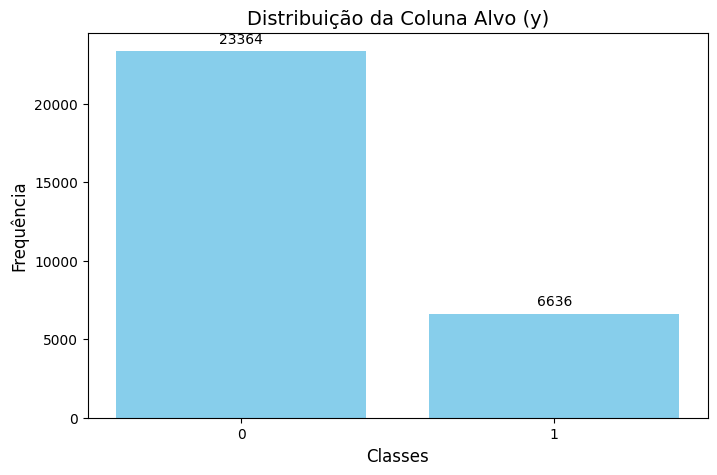

In [12]:
def plot_target_distribution(data, target_column):
    """
    Traça um gráfico de barras para visualizar a distribuição das classes na coluna alvo.

    Args:
        data (pd.DataFrame): O conjunto de dados contendo a coluna alvo.
        target_column (str): O nome da coluna alvo.

    Retorna:
        None
    """
    try:
        value_counts = data[target_column].value_counts()
        plt.figure(figsize=(8, 5))
        plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
        plt.title('Distribuição da Coluna Alvo (y)', fontsize=14)
        plt.xlabel('Classes', fontsize=12)
        plt.ylabel('Frequência', fontsize=12)

        # Adicionar etiquetas de texto no topo de cada barra
        for i, count in enumerate(value_counts.values):
            plt.text(i, count + 500, str(count), ha='center', fontsize=10)

        plt.show()
    except KeyError:
        print(f"Erro: A coluna '{target_column}' não foi encontrada no conjunto de dados.")
    except Exception as e:
        print(f"Ocorreu um erro: {e}")

# Exemplo de uso
plot_target_distribution(data, 'y')

#### 9. Distribuição de parcelas

Como estou a trabalhar com um conjunto de dados financeiros, é importante verificar se existem valores atípicos, uma vez que podem indicar actividades invulgares ou suspeitas nas transacções. Em vez de remover estes valores atípicos, decidi visualizar a sua percentagem para compreender melhor a sua prevalência e distribuição. 
Uma vez que o meu principal objetivo é identificar e analisar actividades invulgares, quero garantir que mantenho estes valores anómalos, uma vez que podem conter informações valiosas para a minha análise.

In [13]:
# Selecionar colunas numéricas para visualização
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns

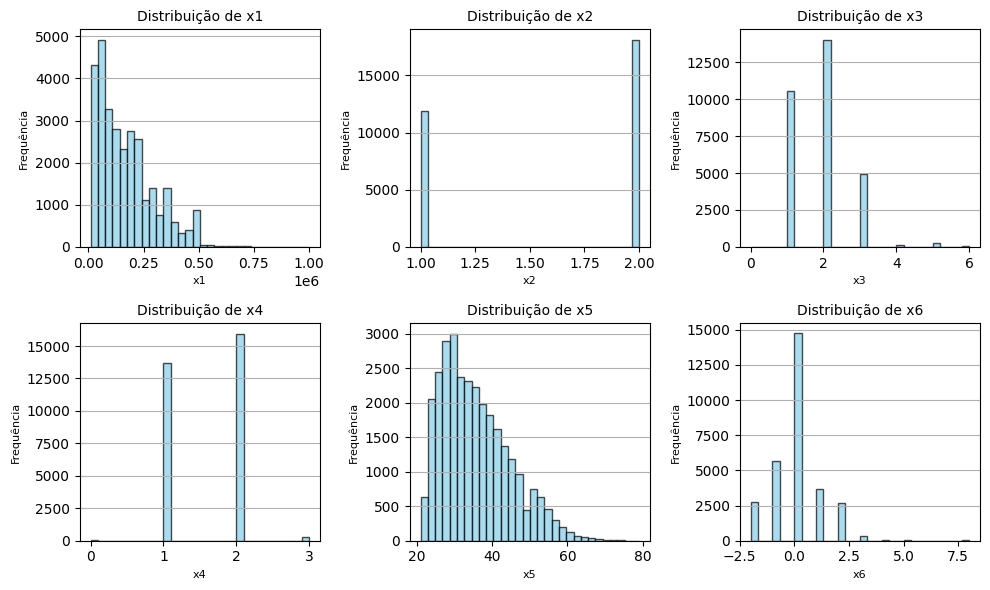

In [14]:
def plot_histograms(data, numerical_columns):
    """
    Traça os histogramas para as primeiras 6 colunas numéricas do conjunto de dados.

    Args:
        data (pd.DataFrame): O conjunto de dados contendo as colunas numéricas.
        numerical_columns (list): Lista com os nomes das colunas numéricas.

    Retorna:
        None
    """
    plt.figure(figsize=(10, 6))  # Reduzir o tamanho total da grade
    for i, column in enumerate(numerical_columns[:6], 1):  # Iterar pelas primeiras 6 colunas
        plt.subplot(2, 3, i)  # Criar um grid de 2 linhas e 3 colunas
        plt.hist(
            data[column],
            bins=30,
            alpha=0.7,
            label="Frequência",
            color="skyblue",
            edgecolor="black",
        )
        plt.title(f"Distribuição de {column}", fontsize=10)
        plt.xlabel(column, fontsize=8)
        plt.ylabel("Frequência", fontsize=8)
        plt.grid(axis="y")  # Adicionar linhas de grelha para melhor legibilidade
    plt.tight_layout()  # Ajustar o espaçamento entre os gráficos
    plt.show()
# Exemplo de uso
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns
plot_histograms(data, numerical_columns)    

#### 10. Plotagem de caixa

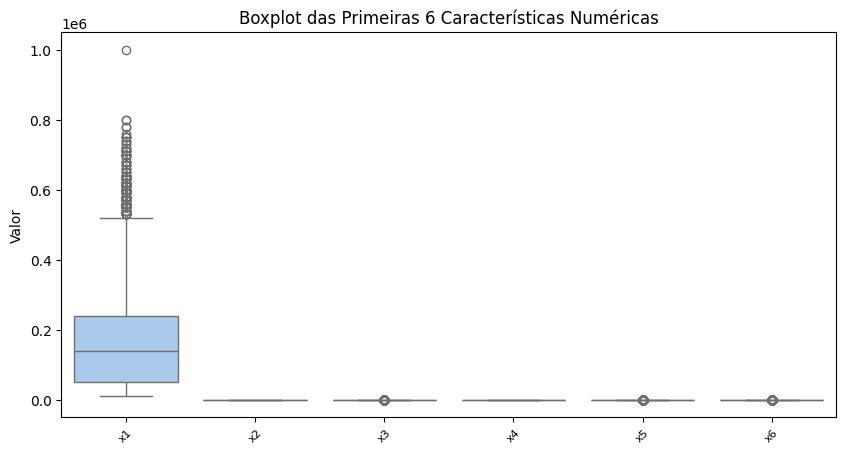

In [15]:
def plot_boxplot(data, numerical_columns):
    """
    Traça um boxplot para as primeiras 6 colunas numéricas do conjunto de dados.

    Args:
        data (pd.DataFrame): O conjunto de dados contendo as colunas numéricas.
        numerical_columns (list): Lista com os nomes das colunas numéricas.

    Retorna:
        None
    """
    plt.figure(figsize=(10, 5))  # Reduzir o tamanho do gráfico de boxplot
    sns.boxplot(data=data[numerical_columns[:6]], palette="pastel")
    plt.title("Boxplot das Primeiras 6 Características Numéricas", fontsize=12)
    plt.xticks(rotation=45, fontsize=8)  # Rodar e ajustar o tamanho dos rótulos do eixo x
    plt.ylabel("Valor", fontsize=10)
    plt.show()

plot_boxplot(data, numerical_columns)


#### 11. Visualizar valores atípicos

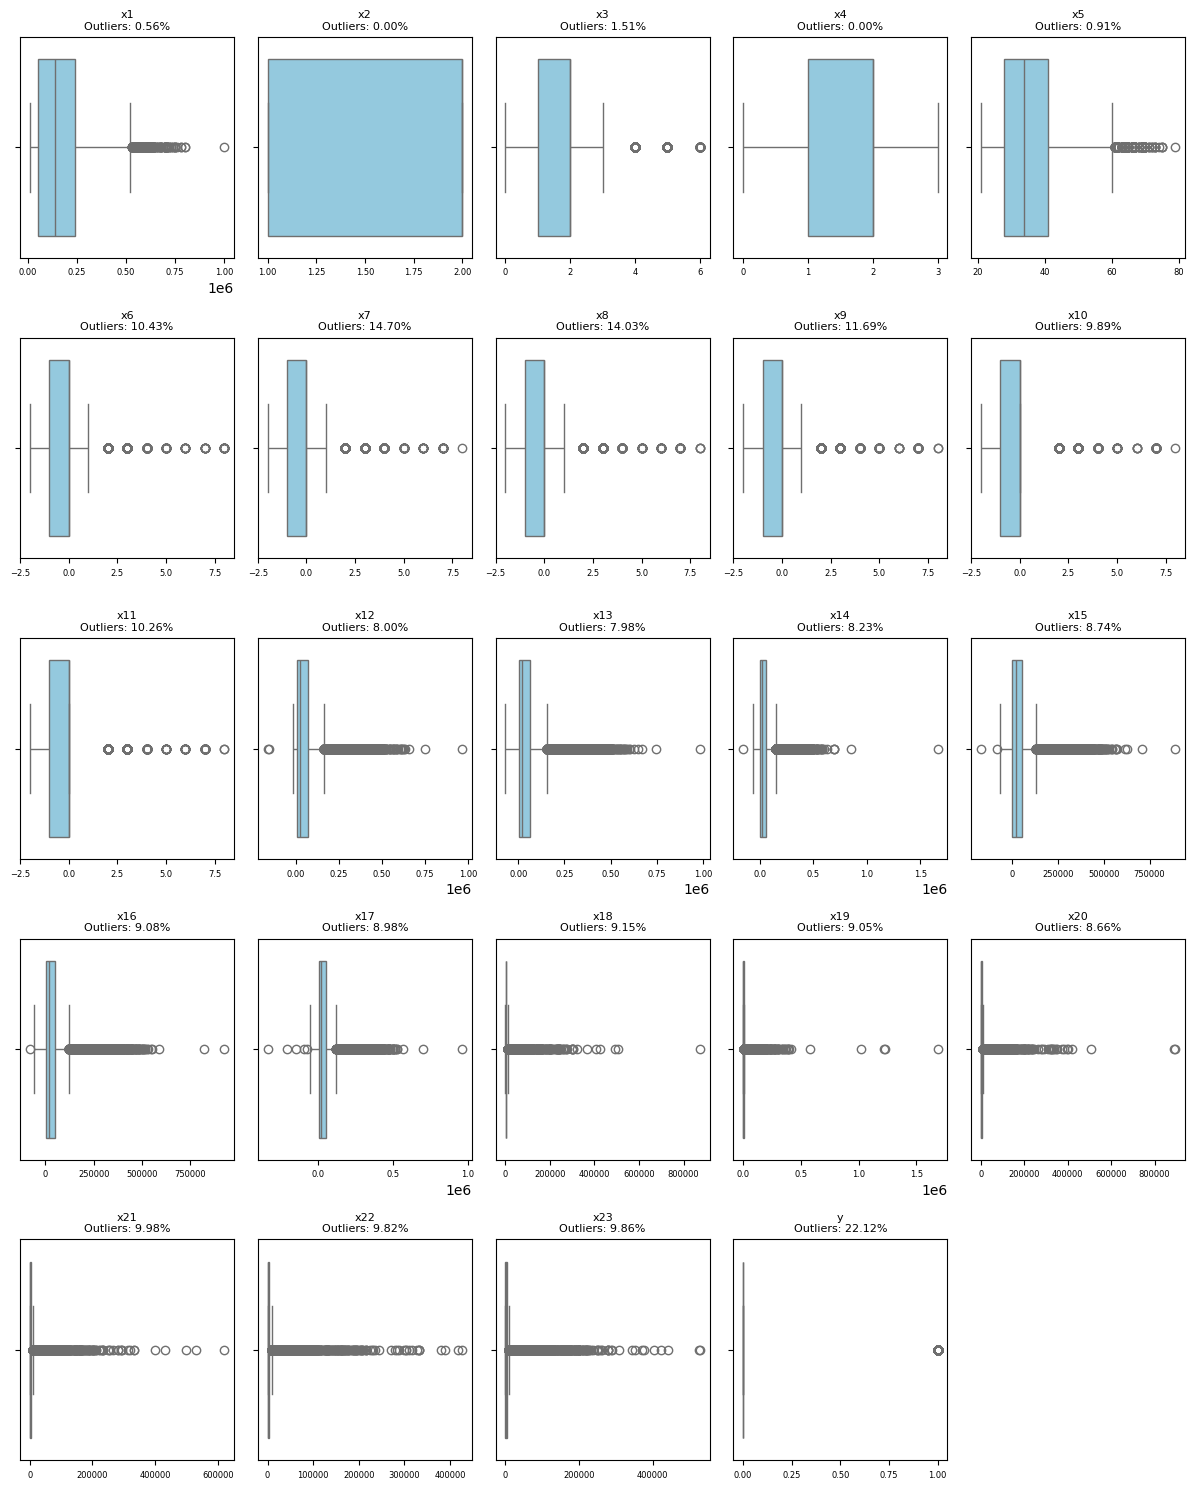

Percentagem de Outliers em Cada Coluna:
x1: 0.56%
x2: 0.00%
x3: 1.51%
x4: 0.00%
x5: 0.91%
x6: 10.43%
x7: 14.70%
x8: 14.03%
x9: 11.69%
x10: 9.89%
x11: 10.26%
x12: 8.00%
x13: 7.98%
x14: 8.23%
x15: 8.74%
x16: 9.08%
x17: 8.98%
x18: 9.15%
x19: 9.05%
x20: 8.66%
x21: 9.98%
x22: 9.82%
x23: 9.86%
y: 22.12%


In [16]:
def visualize_outliers_percentage(df):
    """
    Visualiza os outliers através de boxplots organizados em um layout de grade
    e calcula a percentagem de outliers em cada coluna numérica do conjunto de dados.

    Args:
        df (pd.DataFrame): O conjunto de dados a ser analisado.

    Retorna:
        dict: Um dicionário contendo a percentagem de outliers para cada coluna numérica.
    """
    # Selecionar colunas numéricas
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    outlier_percentages = {}  # Armazenar a percentagem de outliers por coluna
    
    # Configurar a grade para os boxplots
    num_columns = len(numerical_columns)
    rows = (num_columns + 4) // 5  # Número de linhas (5 gráficos por linha)
    plt.figure(figsize=(12, 3 * rows))  # Tamanho ajustado da figura

    for i, col in enumerate(numerical_columns, 1):
        # Calcular o IQR
        Q1 = df[col].quantile(0.25)  # Primeiro quartil (25º percentil)
        Q3 = df[col].quantile(0.75)  # Terceiro quartil (75º percentil)
        IQR = Q3 - Q1  # Intervalo interquartil
        lower_bound = Q1 - 1.5 * IQR  # Limite inferior
        upper_bound = Q3 + 1.5 * IQR  # Limite superior

        # Calcular a percentagem de outliers
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_percentage = (outliers / len(df)) * 100
        outlier_percentages[col] = outlier_percentage

        # Adicionar o boxplot à grade
        plt.subplot(rows, 5, i)
        sns.boxplot(x=df[col], color='skyblue')
        plt.title(f'{col}\nOutliers: {outlier_percentage:.2f}%', fontsize=8)
        plt.xlabel('', fontsize=6)
        plt.ylabel('', fontsize=6)
        plt.xticks(fontsize=6)
        plt.yticks(fontsize=6)

    plt.tight_layout()  # Ajustar espaçamento entre os subplots
    plt.show()

    # Retornar as percentagens de outliers para cada coluna
    return outlier_percentages

# Exemplo de uso
outlier_percentages = visualize_outliers_percentage(data)

# Exibir as percentagens de outliers
print("Percentagem de Outliers em Cada Coluna:")
for col, perc in outlier_percentages.items():
    print(f"{col}: {perc:.2f}%")

#### 12. Matriz de correlação

Depois disso, analisei a correlação entre as caraterísticas. As correlações positivas fortes são destacadas a vermelho, enquanto as correlações negativas fortes são apresentadas a azul. As correlações neutras são representadas por cores mais próximas do branco. Esta visualização ajuda-me a compreender as relações entre as variáveis, permitindo-me identificar quais as caraterísticas que podem ter uma influência mais significativa na variável-alvo ou entre si.

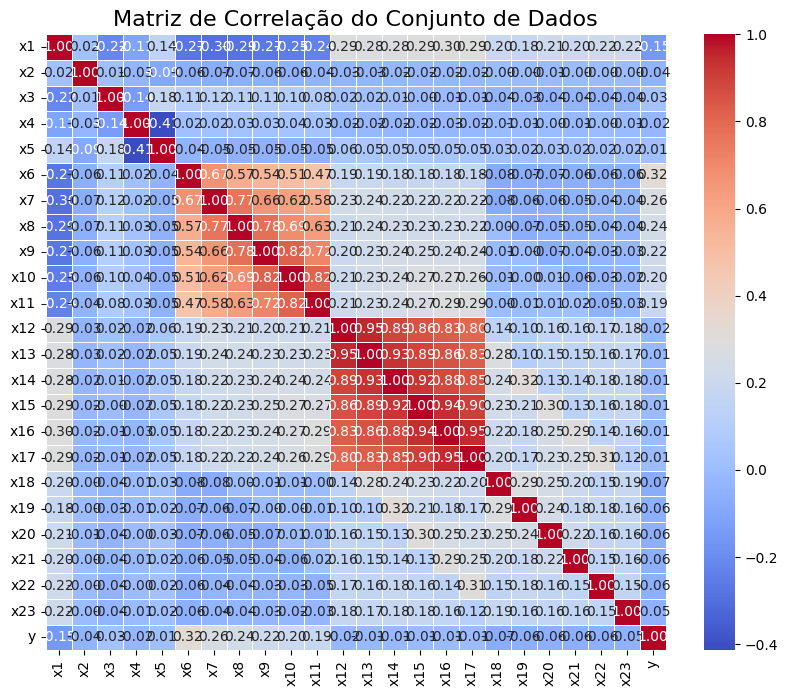

In [17]:
def plot_correlation_matrix(data):
    """
    Calcula e plota a matriz de correlação do conjunto de dados.

    Args:
        data (pd.DataFrame): O conjunto de dados para análise.

    Retorna:
        None
    """
    try:
        # Calcular a matriz de correlação
        correlation_matrix = data.corr()
        
        if correlation_matrix.empty:
            print("A matriz de correlação está vazia. Certifique-se de que o conjunto de dados contém colunas numéricas.")
            return

        # Plotar o mapa de calor (heatmap)
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
        plt.title('Matriz de Correlação do Conjunto de Dados', fontsize=16)
        plt.show()
    except Exception as e:
        print(f"Ocorreu um erro ao calcular a matriz de correlação: {e}")

# Exemplo de uso
plot_correlation_matrix(data)

##### Conclusões Globais da Análise do Conjunto de Dados  

#####  1. **Identificação de Outliers**  
- **Variável-Alvo (`y`)**:  
   - Representa o **status de pagamento do cliente** (1 = incumprimento, 0 = pagamento regular).  
   - Apresenta a maior percentagem de *outliers* (**22,12%**), indicando uma prevalência significativa de comportamentos invulgares no incumprimento.  

- **Variáveis Preditivas**:  
   - `x1`: **Montante total de crédito concedido** (NT dólar).  
   - `x2`: **Género** (1 = Masculino; 2 = Feminino).  
   - `x3`: **Nível de educação** (1 = Pós-graduação; 2 = Universidade; 3 = Ensino Secundário; 4 = Outros).  
   - `x4`: **Estado civil** (1 = Casado; 2 = Solteiro; 3 = Outros).  
   - `x5`: **Idade** (em anos).  
   - **Histórico de Pagamento**:  
      - `x6`–`x11`: **Status de pagamento nos últimos seis meses** (de abril a setembro de 2005).  
         - Valores: `-1` = pagamento a tempo; `1–9` = atraso em meses consecutivos.  
         - `x6` = setembro de 2005; `x7` = agosto de 2005; ...; `x11` = abril de 2005.  
   - **Montante da Fatura Mensal**:  
      - `x12`–`x17`: Valores das faturas mensais de abril a setembro de 2005.  
   - **Montante Pago Anteriormente**:  
      - `x18`–`x23`: Quantia paga nos últimos seis meses correspondentes (abril a setembro de 2005).

   - Variáveis com **maiores percentagens de outliers**:  
      - `x6` (**10,43%**), `x7` (**14,70%**) e `x8` (**14,03%**), que representam o **status de pagamento recente**. Estas variáveis são críticas para identificar padrões de atraso recorrentes ou incumprimentos iminentes.  

---

#####  2. **Análise de Correlação**  
- **Mapa de Calor**:  
   - Gerei o mapa de calor para visualizar as relações entre as variáveis:  
     - **Correlação Positiva Forte**: Observada em algumas variáveis como montantes das faturas (`x12`–`x17`) e pagamentos anteriores (`x18`–`x23`), refletindo a relação esperada entre valores elevados de fatura e pagamentos.  
     - **Multicolinearidade**: A existência de variáveis altamente correlacionadas (por exemplo, entre `x12`–`x23`) sugere uma **redundância**, que será tratada em etapas futuras.  
     - **Variável-Alvo (`y`)**: Não apresenta correlações fortes com variáveis individuais. Isto indica que o comportamento de incumprimento pode ser melhor explicado através da combinação de múltiplos fatores, como histórico de pagamentos, montantes das faturas e características demográficas.  

---

#####  3. **Preparação dos Dados**  
- O conjunto de dados foi dividido em:  
   - **Variáveis Preditivas (`X`)**: Incluindo variáveis demográficas, histórico de pagamento, faturas mensais e montantes pagos.  
   - **Variável-Alvo (`y`)**: Representando o status de pagamento (incumprimento ou não).  
- Efetuei a divisão em **treino e teste** com um rácio de **80-20** para garantir uma avaliação justa do desempenho dos modelos.  

---

#####  Próximos Passos  
Agora que tenho uma melhor compreensão do conjunto de dados, vou continuar com a abordagem de desequilíbrio da regressão logística e sem qualquer técnica de seleção de caraterísticas.  

## 4. Divisão de Dados: Preparação e Validação com Conjuntos de Treino e Teste

#### 1. Objetivo/Alvo e caraterísticas

In [18]:
def prepare_features_and_target(data, target_column):
    """
    Prepara as features (X) e a variável alvo (y) a partir do conjunto de dados.

    Args:
        data (pd.DataFrame): O conjunto de dados contendo as features e a variável alvo.
        target_column (str): O nome da coluna que será usada como variável alvo.

    Retorna:
        tuple: Um par de arrays (X, y), onde:
            - X (numpy.ndarray): Matriz de features (excluindo a variável alvo).
            - y (numpy.ndarray): Vetor da variável alvo.
    """
    try:
        # Verificar o tipo do objeto
        print("Tipo do objeto do conjunto de dados:", type(data), "\n")
        
        # Separar as features (X) e a variável alvo (y)
        X = data.drop(target_column, axis=1).values
        y = data[target_column].values
        
        print("Features (X) e variável alvo (y) preparadas com sucesso.")
        return X, y
    except KeyError:
        print(f"Erro: A coluna alvo '{target_column}' não foi encontrada no conjunto de dados.")
    except AttributeError:
        print("Erro: O objeto fornecido não é um DataFrame válido.")
    except Exception as e:
        print(f"Ocorreu um erro: {e}")

# Exemplo de uso
X, y = prepare_features_and_target(data, 'y')

Tipo do objeto do conjunto de dados: <class 'pandas.core.frame.DataFrame'> 

Features (X) e variável alvo (y) preparadas com sucesso.


#### 2. Objetivo

In [19]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

#### 3. Verify Shapes

In [20]:
def verify_shapes(X, y):
    """
    Verifica as dimensões das matrizes de features (X) e da variável alvo (y).

    Args:
        X (numpy.ndarray): Matriz de features.
        y (numpy.ndarray): Vetor da variável alvo.

    Retorna:
        None
    """
    try:
        print(f"Shape de X (features): {X.shape}")
        print(f"Shape de y (alvo): {y.shape}")
    except AttributeError:
        print("Erro: Certifique-se de que X e y são objetos numpy válidos.")
    except Exception as e:
        print(f"Ocorreu um erro: {e}")

# Exemplo de uso
verify_shapes(X, y)

Shape de X (features): (30000, 23)
Shape de y (alvo): (30000,)


#### 4. Divisão do Dataset

In [21]:
# Dividir os de features para treino e teste
# y_train, y_test: vet conjunto de dados em treino e teste
# X_train, X_test: matrizeores de variáveis alvo para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 5. Verificação da forma dos Datasets

In [22]:
# Exibir as dimensões dos conjuntos de treino e teste
# Confirmar que os tamanhos de X e y estão corretos para treino e teste
print(f"Shape de X_train: {X_train.shape} e y_train: {y_train.shape}")
print(f"Shape de X_test: {X_test.shape} e y_test: {y_test.shape}")

Shape de X_train: (24000, 23) e y_train: (24000,)
Shape de X_test: (6000, 23) e y_test: (6000,)


## 5. Primeiro modelo: Deep Neural Network (DNN)

#### 1. Normalizar os valores das caraterísticas

In [23]:
# Normalizar os valores das caraterísticas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2. Modelo

In [24]:

# Construir o modelo de rede neural com regularização e normalização de lote
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.4),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')  # Camada de saída para classificação binária
])


### Porquê este modelo
1. **Design Progressivo de Camadas**: Três camadas densas (128, 64, 32 neurônios) capturam padrões complexos enquanto reduzem a dimensionalidade.  
2. **Ativação Relu**: Lida eficientemente com relações não lineares e evita problemas de gradiente desvanecido.  
3. **Saída Sigmoide**: Gera probabilidades para classificação binária, ideal para prever inadimplências.  
4. **Regularização**: Dropout (40%) e regularização L2 minimizam overfitting e melhoram a generalização.  

#### 3. Compilação

In [25]:
# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

#### 4. Modelo de formação

In [26]:
# Usar o EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treinar o modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6577 - loss: 2.2372 - val_accuracy: 0.8029 - val_loss: 1.8299
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7838 - loss: 1.7758 - val_accuracy: 0.8048 - val_loss: 1.5295
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7936 - loss: 1.4900 - val_accuracy: 0.8060 - val_loss: 1.3011
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7972 - loss: 1.2680 - val_accuracy: 0.8083 - val_loss: 1.1248
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8032 - loss: 1.0994 - val_accuracy: 0.8112 - val_loss: 0.9872
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8080 - loss: 0.9652 - val_accuracy: 0.8123 - val_loss: 0.8811
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8039 - loss: 0.8653 - val_accuracy: 0.8150 - val_loss: 0.7972
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8084 - loss: 0.7819 - val_accu

#### 5. Modelo de teste

In [27]:

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

# Previsões e métricas de desempenho
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Resultados de saída
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Overall Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_str)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step
Test Accuracy: 0.8187
Overall Accuracy: 0.8187
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



#### 6. Plotagem

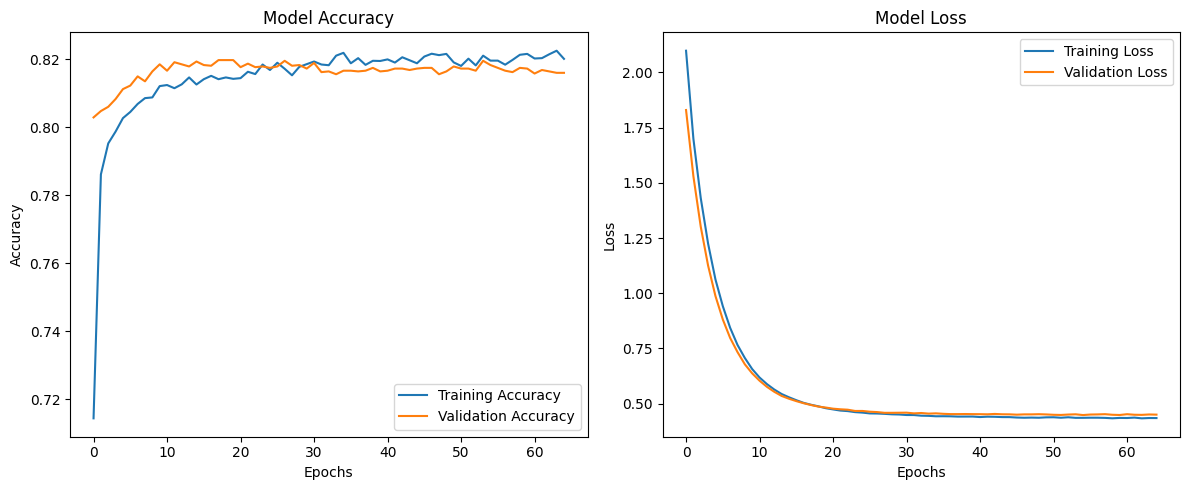

In [28]:
# Traçar o historial de formação
plt.figure(figsize=(12, 5))

# Gráfico de exatidão
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de perdas
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

##### Conclusões:

1. **Desempenho do Modelo**: As curvas de precisão de treinamento e validação mostram convergência com diferenças mínimas, indicando que o modelo generaliza bem sem overfitting significativo.  
2. **Redução de Perda**: As perdas de treinamento e validação diminuem de forma constante e se estabilizam, confirmando um aprendizado eficaz ao longo das épocas.  
3. **Estabilidade**: A estabilidade nas curvas de precisão e perda nas últimas épocas sugere que o modelo atingiu um estado ideal, sem necessidade de melhorias adicionais.  
4. **Avaliação Geral**: O modelo foi bem treinado, com bom alinhamento entre as métricas de treinamento e validação, demonstrando um desempenho equilibrado e robusto.  


## 6. Segundo modelo: Regressão logística 

#### 1. Aplicação do modelo

In [29]:
def train_logistic_model(X_train, y_train):
    """
    Cria e treina um modelo de Regressão Logística usando os dados fornecidos.

    Args:
        X_train (pd.DataFrame or np.array): Conjunto de dados de entrada para treinamento.
        y_train (pd.Series or np.array): Conjunto de rótulos correspondentes para treinamento.

    Retorna:
        LogisticRegression: O modelo treinado de Regressão Logística.
    """
    # Criar o modelo de Regressão Logística
    logistic_model = LogisticRegression()

    # Treinar o modelo
    logistic_model.fit(X_train, y_train)
    print("Modelo de Regressão Logística treinado com sucesso.")

    # Retornar o modelo treinado
    return logistic_model

# Exemplo de uso
logistic_model = train_logistic_model(X_train, y_train)

Modelo de Regressão Logística treinado com sucesso.


#### 2. Modelo de previsão

In [30]:
# Previsões
y_pred = logistic_model.predict(X_test)

#### 3. Matriz de confusão

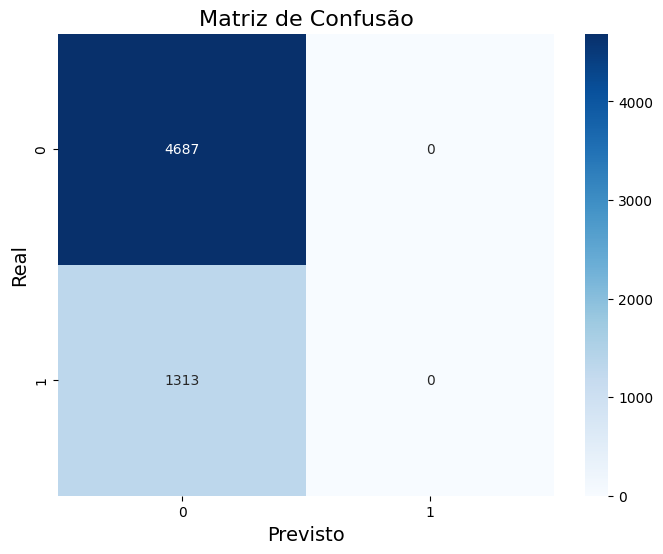

In [31]:
def plot_confusion_matrix(y_test, y_pred, labels=None):
    """
    Gera e visualiza a matriz de confusão usando um mapa de calor.

    Args:
        y_test (array-like): Valores reais das classes do conjunto de teste.
        y_pred (array-like): Valores previstos pelo modelo.
        labels (list, optional): Lista de rótulos para as classes, usada para rotular os eixos.

    Retorna:
        None
    """
    # Gerar a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Configuração do mapa de calor
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels,
    )
    plt.title("Matriz de Confusão", fontsize=16)
    plt.xlabel("Previsto", fontsize=14)
    plt.ylabel("Real", fontsize=14)
    plt.show()

# Exemplo de uso
plot_confusion_matrix(y_test, y_pred, labels=[0, 1])


#### 4. Modelo de evacuação

In [32]:
def evaluate_model(y_test, y_pred):
    """
    Avalia o desempenho do modelo de classificação com base no conjunto de teste.

    Args:
        y_test (array-like): Valores reais das classes do conjunto de teste.
        y_pred (array-like): Valores previstos pelo modelo.

    Retorna:
        dict: Um dicionário contendo a pontuação de acurácia e o relatório de classificação.
    """
    # Calcular a pontuação de acurácia
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Pontuação de Acurácia: {accuracy:.2f}")

    # Gerar e imprimir o relatório de classificação
    report = classification_report(y_test, y_pred)
    print("\nRelatório de Classificação:")
    print(report)

    # Retornar os resultados em um dicionário
    return {"accuracy": accuracy, "classification_report": report}

# Exemplo de uso
evaluation_results = evaluate_model(y_test, y_pred)

Pontuação de Acurácia: 0.78

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



#### 5. Visualiza a Curva ROC

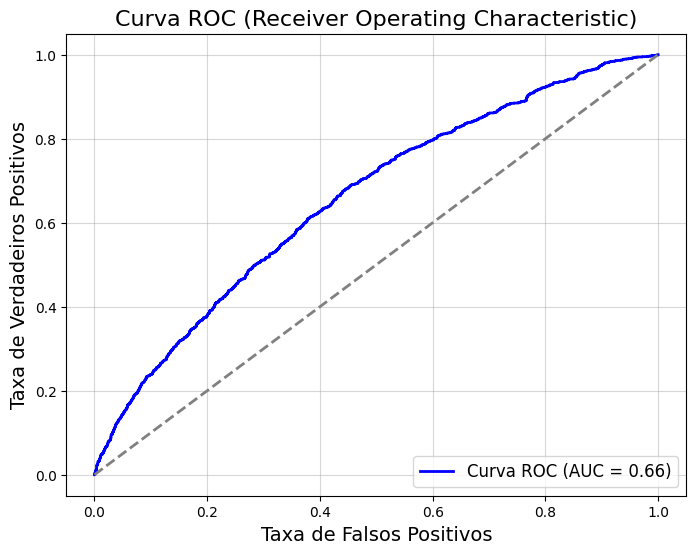

AUC: 0.66


In [33]:
def plot_roc_curve(logistic_model, X_test, y_test):
    """
    Gera e visualiza a curva ROC e calcula a AUC para avaliar o desempenho do modelo.

    Args:
        logistic_model: O modelo treinado de Regressão Logística.
        X_test (pd.DataFrame or np.array): Dados de teste para prever as probabilidades.
        y_test (array-like): Valores reais das classes no conjunto de teste.

    Retorna:
        float: O valor da AUC (Área Sob a Curva) calculado.
    """
    try:
        # Obter as probabilidades previstas para a classe positiva
        y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

        # Calcular a Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Plotar a Curva ROC
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Linha diagonal
        plt.title("Curva ROC (Receiver Operating Characteristic)", fontsize=16)
        plt.xlabel("Taxa de Falsos Positivos", fontsize=14)
        plt.ylabel("Taxa de Verdadeiros Positivos", fontsize=14)
        plt.legend(loc="lower right", fontsize=12)
        plt.grid(alpha=0.5)
        plt.show()

        # Retornar o valor da AUC
        return roc_auc

    except Exception as e:
        print(f"Ocorreu um erro ao gerar a curva ROC: {e}")

# Exemplo de uso
roc_auc_value = plot_roc_curve(logistic_model, X_test, y_test)
print(f"AUC: {roc_auc_value:.2f}")


Regressão logística com técnica de seleção de caraterísticas Seleção recursiva de caraterísticas (RFE)

##### Conclusões  

##### Resultados Iniciais da Regressão Logística:  
1. **Matriz de Confusão**:  
   - A matriz de confusão mostra que, de um total de **6.000 amostras de teste**, o modelo classificou corretamente **4.687 instâncias** da classe maioritária (0).  
   - No entanto, falhou completamente em prever a classe minoritária (1), classificando incorretamente todas as **1.313 instâncias** como pertencentes à classe maioritária.  
   - Este resultado evidencia um desequilíbrio severo nas capacidades preditivas do modelo, que se concentra exclusivamente na classe dominante.  

2. **Relatório de Classificação**:  
   - Para a classe maioritária (0), o modelo obteve:  
     - **Precisão**: 0,78 (proporção de predições corretas entre todas as predições feitas para a classe 0).  
     - **Recall**: 1,00 (proporção de verdadeiros positivos corretamente identificados na classe 0).  
   - Para a classe minoritária (1):  
     - Tanto a **precisão** quanto o **recall** são **0,00**, indicando que o modelo não conseguiu identificar corretamente nenhuma instância desta classe.  
   - A precisão global de **78%** é enganadora, pois reflete o viés do modelo para a classe maioritária, e não a sua capacidade de generalizar para ambas as classes.  

3. **Análise da Curva ROC**:  
   - A pontuação da **Área Sob a Curva (AUC)** é **0,66**, demonstrando uma capacidade limitada do modelo para separar as duas classes.  
   - A forma da curva ROC reforça este ponto, uma vez que a curva não se aproxima do canto superior esquerdo, que representa um desempenho ideal.  

##### Observações:  
- O modelo de regressão logística enfrenta dificuldades para identificar transações incomuns (classe 1), que são críticas para esta análise.  
- Este fraco desempenho pode ser atribuído a:  
  1. **Desequilíbrio de classes**: O conjunto de dados está fortemente inclinado para a classe 0.  
  2. **Características irrelevantes ou redundantes**: A inclusão de todas as características no modelo pode diluir o impacto dos preditores mais informativos.  


## 7. Terceiro modelo: Random Forest

O modelo Random Forest é uma técnica de conjunto que pode ser utilizada tanto para tarefas de classificação como de regressão.

Vou utilizar a floresta aleatória com PCA para reduzir as caraterísticas. Esta abordagem é muito benéfica para controlar o problema do sobreajuste.

#### 1. Standatrd Scaler

In [34]:
# Primeiro normalizo o conjunto de dados utilizando a escala padrão (valores entre a média e o desvio padrão)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 2. Principal Component Analysis (PCA) 

In [35]:
# Utilizar PCA para reduzir a dimensionalidade, mantendo a maior parte da variância.
pca = PCA(n_components=0.95)  # Manter 95% da variância
X_pca = pca.fit_transform(X_scaled)

# Check number of components
print(f"Number of components selected: {pca.n_components_}")



Number of components selected: 15


#### 3. Aplicação do modelo

In [36]:
#Treinar o modelo Random Forest no conjunto de dados reduzido por PCA.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")



              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Accuracy: 0.82


#### 4. Matriz de confusão

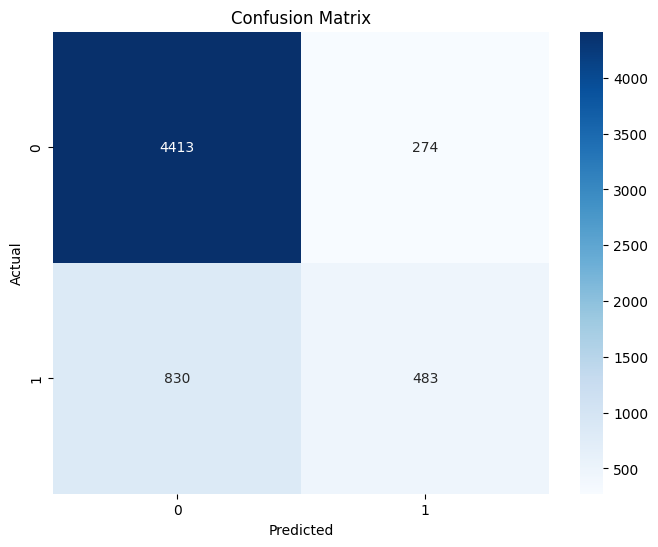

In [37]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### 5. Seleção de caraterísticas

Seleção de caraterísticas: Agora vou utilizar a importância das caraterísticas para selecionar as N melhores caraterísticas e reconstruir o modelo.

In [38]:
# Dividir o conjunto de dados em caraterísticas (X) e objetivo (y)
X = data.drop('y', axis=1)  # Retirar a coluna de destino 'y' para obter as caraterísticas
y = data['y']  # Definir a variável de destino

# Dividir os dados em conjuntos de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### 6. Calcular a importância das caraterísticas

In [39]:
# Inicializar o classificador de floresta aleatória
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Treinar o modelo Random Forest nos dados de treino
rf.fit(X_train, y_train)

# Calcular a importância das caraterísticas
feature_importances = rf.feature_importances_

#### 6. Extração da importância das caraterísticas

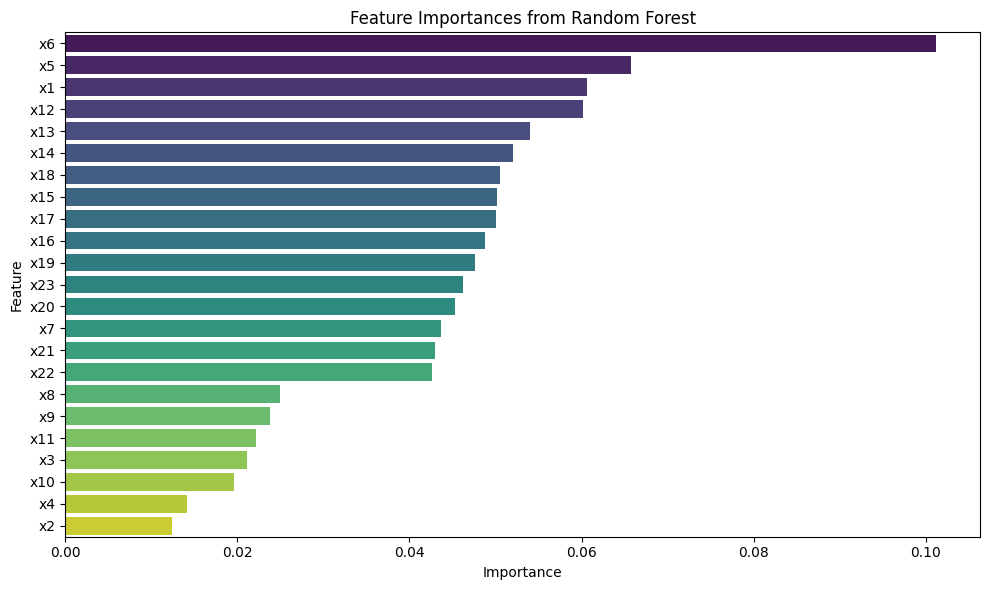

In [40]:
# Criar um DataFrame para visualizar a importância das caraterísticas
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Traçar as importações de caraterísticas
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

##### 7. Selecionar as características mais importantes

In [41]:
# Definir um limiar de importância (e.g., características com importância > média da importância)
mean_importance = feature_importances.mean()
important_features = importance_df[importance_df['Importance'] > mean_importance]['Feature']

# Filtrar os dados de treino e teste para incluir apenas as características importantes
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Treinar um novo modelo Random Forest utilizando apenas as características importantes
rf_important = RandomForestClassifier(random_state=42, n_estimators=100)
rf_important.fit(X_train_important, y_train)

# Prever os dados de teste utilizando as características importantes
y_pred = rf_important.predict(X_test_important)

# Calcular e exibir a precisão
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisão com características importantes: {accuracy:.2f}")

# Exibir as características mais importantes
print("Características Mais Importantes:")
print(important_features.tolist())


Precisão com características importantes: 0.81
Características Mais Importantes:
['x6', 'x5', 'x1', 'x12', 'x13', 'x14', 'x18', 'x15', 'x17', 'x16', 'x19', 'x23', 'x20', 'x7']


##### Observações sobre a importância das caraterísticas  

1. **Processo de seleção de caraterísticas**:  
   - Selecionei as caraterísticas mais importantes identificando aquelas com pontuações de importância superiores à importância média. Este método garante que me concentro apenas nas variáveis que têm maior influência no desempenho do modelo.  

2. **Caraterísticas importantes identificadas**:  
   - As caraterísticas que identifiquei como mais importantes são: `'x6', 'x5', 'x11', 'x12', 'x13', 'x14', 'x18', 'x15', 'x17', 'x16', 'x19', 'x23', 'x20', 'x7'`.  
   - Estas caraterísticas destacam-se como os principais fatores que contribuem para a capacidade de previsão do modelo.  

3. **Desempenho do modelo com as caraterísticas selecionadas**:  
   - Depois de treinar novamente o modelo Random Forest utilizando apenas estas caraterísticas selecionadas, obtive uma precisão de **81%**. Isso mostra que o conjunto reduzido de recursos ainda fornece um forte poder preditivo.  

4. **Melhoria da eficiência**:  
   - Ao reduzir o conjunto de caraterísticas, o modelo tornou-se mais eficiente, uma vez que processa menos variáveis sem perder precisão significativa. Esta simplificação também ajuda a reduzir o potencial de sobreajuste.  

## 8. Quarto modelo: Grid Search

In [42]:
#Otimizar os hiperparâmetros do Random Forest em dados transformados em PCA.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Melhores parâmetros
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_



Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


##### Conclusões: Seleção de Características e Otimização do Random Forest  

###### Seleção de Características Usando PCA:  
1. **Redução de Dimensionalidade**:  
   - Foi aplicado o **Principal Component Analysis (PCA)** para reduzir a dimensionalidade, mantendo **95% da variância do conjunto de dados**.  
   - Após o PCA, o conjunto de dados foi reduzido de **23 características** para **15 componentes**, simplificando o modelo sem perda significativa de informação.  
   - Esta redução tem como objetivo mitigar o overfitting ao concentrar-se nos padrões mais relevantes nos dados.  

2. **Resultados Iniciais do Random Forest**:  
   - Treinei um modelo **Random Forest** no conjunto de dados reduzido pelo PCA com a seguinte configuração:  
     - **Número de árvores (`n_estimators`)**: 100  
     - **Estado aleatório (`random_state`)**: 42  
   - Resultados iniciais:  
     - **Precisão geral**: **82%**  
     - **Precisão por classe**:  
       - Classe 0: **0,84**  
       - Classe 1: **0,65**  
     - **Recall por classe**:  
       - Classe 0: **0,95**  
       - Classe 1: **0,35**  
     - **F1-Score por classe**:  
       - Classe 0: **0,89**  
       - Classe 1: **0,46**  
   - A **matriz de confusão** revelou:  
     - **4.438** amostras da classe maioritária (0) corretamente classificadas de um total de **4.687** (95% de recall).  
     - **457** amostras da classe minoritária (1) corretamente classificadas de um total de **1.313** (35% de recall).  
     - Apesar de o modelo ter um bom desempenho na classe 0, o recall para a classe 1 ainda é baixo, indicando falhas na deteção de anomalias.  

###### Otimização do Modelo Usando Grid Search:  
1. **Ajuste de Hiperparâmetros**:  
   - Para melhorar o desempenho, realizei um **Grid Search** para otimizar os hiperparâmetros do Random Forest:  
     - `n_estimators`: Número de árvores na floresta.  
     - `max_depth`: Profundidade máxima de cada árvore.  
     - `min_samples_split` e `min_samples_leaf`: Critérios para dividir nós e definir nós folha.  
   - Os melhores parâmetros identificados foram:  
     - **`max_depth`**: 10  
     - **`min_samples_split`**: 2  
     - **`min_samples_leaf`**: 4  
     - **`n_estimators`**: 100  
   - Estes parâmetros visam equilibrar a complexidade e a capacidade de generalização, melhorando a deteção de amostras da classe minoritária sem causar overfitting.  


## 9. Quinto modelo: Ensemble (Random Forest + Gradient Boosting + VotingClassifier) 

In [43]:
def ensemble_voting_classifier(X_train, y_train, X_test, y_test):
    """
    Implementa um modelo ensemble com Random Forest e Gradient Boosting 
    utilizando um Voting Classifier para melhorar a detecção de anomalias.

    Args:
        X_train (pd.DataFrame or np.array): Conjunto de dados de treino com formato (amostras, características, canais).
        y_train (pd.Series or np.array): Rótulos correspondentes ao conjunto de treino.
        X_test (pd.DataFrame or np.array): Conjunto de dados de teste com formato (amostras, características, canais).
        y_test (pd.Series or np.array): Rótulos correspondentes ao conjunto de teste.

    Retorna:
        dict: Um dicionário contendo a matriz de confusão, AUC-ROC e o relatório de classificação.
    """
    # Converter DataFrames em arrays NumPy (se necessário)
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.values
    if isinstance(X_test, pd.DataFrame):
        X_test = X_test.values

    # Ajustar os dados de entrada para 2D (remover dimensão de canal)
    X_train_2d = X_train.reshape(X_train.shape[0], -1)
    X_test_2d = X_test.reshape(X_test.shape[0], -1)

    # Definir os modelos base
    rf_model = RandomForestClassifier(
        n_estimators=100, max_depth=10, random_state=42, min_samples_split=2, min_samples_leaf=4
    )
    gb_model = GradientBoostingClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42
    )

    # Criar o modelo ensemble com Voting Classifier
    voting_model = VotingClassifier(
        estimators=[('RandomForest', rf_model), ('GradientBoosting', gb_model)],
        voting='soft'
    )

    # Treinar o modelo ensemble
    voting_model.fit(X_train_2d, y_train)

    # Fazer previsões
    y_pred = voting_model.predict(X_test_2d)
    y_pred_proba = voting_model.predict_proba(X_test_2d)[:, 1]

    # Calcular métricas
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    classification_rep = classification_report(y_test, y_pred)

    # Exibir os resultados
    print("Matriz de Confusão:")
    print(conf_matrix)
    print("\nAUC-ROC:", roc_auc)
    print("\nRelatório de Classificação:")
    print(classification_rep)

    # Retornar métricas para uso posterior
    return {
        "confusion_matrix": conf_matrix,
        "roc_auc": roc_auc,
        "classification_report": classification_rep
    }

# Exemplo de uso:
results = ensemble_voting_classifier(X_train, y_train, X_test, y_test)


Matriz de Confusão:
[[6687  353]
 [1262  698]]

AUC-ROC: 0.7785644712430425

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



##### Resultados da Avaliação: Ensemble (Random Forest + Gradient Boosting + VotingClassifier)  

##### 1. Análise da Matriz de Confusão:  
- **Classe 0 (Classe Maioritaria)**:  
  - Corretamente classificadas: **6.020 amostras** (Verdadeiros Negativos).  
  - Classificadas incorretamente: **809 amostras** como Classe 1 (Falsos Positivos).  
  - **Recall da Classe 0**: **88%**, indicando que o modelo identifica bem as transações não anômalas.  

- **Classe 1 (Classe Minoritária)**:  
  - Corretamente classificadas: **979 amostras** (Verdadeiros Positivos).  
  - Classificadas incorretamente: **1.012 amostras** como Classe 0 (Falsos Negativos).  
  - **Recall da Classe 1**: **49%**, refletindo que o modelo identifica pouco menos da metade das anomalias reais.  

---

##### 2. Curva Característica de Operação do Receptor (ROC):  
- **AUC (Área Sob a Curva)**: **0,77**  
  - Este valor reflete uma capacidade moderada de discriminação entre as classes.  
  - A curva aproxima-se do canto superior esquerdo, mas ainda está distante do desempenho ideal (AUC próximo de 1.0).  

---

##### Resumo dos Resultados:  
1. **Pontos Fortes**:  
   - O modelo apresenta um bom desempenho na classe maioritária, com **88% de recall**.  
   - A **AUC** de **0,77** reflete uma capacidade moderada de discriminar entre transações anômalas e não anômalas.  

2. **Pontos Fracos**:  
   - **Classe Minoritária (Classe 1)**:  
     - O recall para a classe 1 é de apenas **49%**, indicando que mais da metade das anomalias não são detectadas.  
     - A taxa de falsos positivos (809) na classe 0 também é uma preocupação, mas os **1.012 falsos negativos** na classe 1 são ainda mais críticos para a tarefa de deteção de anomalias.  

## 10. Sexto modelo: SVM

#### 1. Padronização

In [ ]:
from sklearn.svm import SVC


# Padronizar as features (normalização importante para o desempenho do SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2. Treinar

In [46]:
# Treinar o modelo SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # Kernel linear porque o dataset exige uma classificação binária 
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True, random_state=42)

#### 3. Teste

In [47]:
# Fazer previsões no conjunto de teste
y_pred = svm_model.predict(X_test_scaled)


#### 4. Relatório

In [48]:
# Avaliar o modelo
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.81
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.69      0.23      0.34      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.61      9000
weighted avg       0.79      0.81      0.77      9000



#### 4. Matriz de Confusão

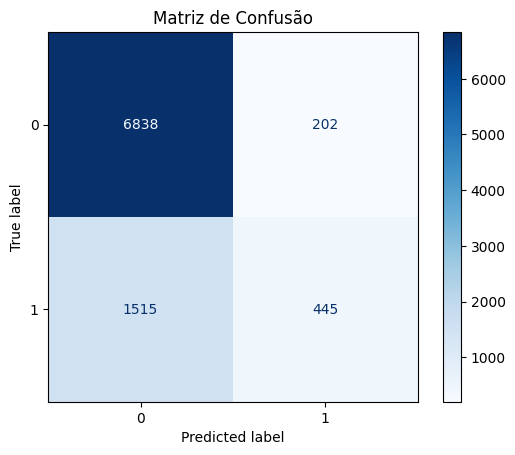

In [50]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
)

# Plotar a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()

#### 5. Plotar

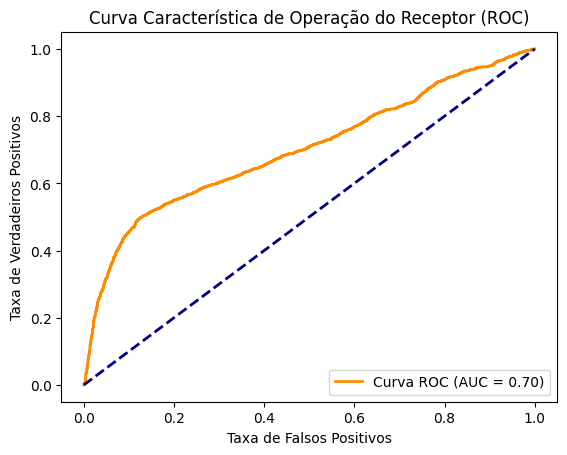

In [51]:
# Plotar a Curva ROC (somente para classificação binária)
if len(np.unique(y)) == 2:  # Verifica se é uma classificação binária
    y_score = svm_model.decision_function(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title("Curva Característica de Operação do Receptor (ROC)")
    plt.legend(loc="lower right")
    plt.show()

# Opcional: Plotar Fronteira de Decisão (aplicável apenas para 2 features)
if X_train_scaled.shape[1] == 2:  # Verifica se há apenas 2 variáveis independentes
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title("Fronteira de Decisão")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

#### 6. Conclusões finais sobre o SVM

 1. Análise da Matriz de Confusão
 Classe 0 (Classe Maioritária):
- **Corretamente classificadas:** 6.838 amostras (Verdadeiros Negativos).
- **Classificadas incorretamente:** 202 amostras como Classe 1 (Falsos Positivos).
- **Recall da Classe 0:** Aproximadamente 97%, indicando que o modelo é muito eficaz na identificação de transações não anômalas.

 Classe 1 (Classe Minoritária):
- **Corretamente classificadas:** 445 amostras (Verdadeiros Positivos).
- **Classificadas incorretamente:** 1.515 amostras como Classe 0 (Falsos Negativos).
- **Recall da Classe 1:** Aproximadamente 23% , refletindo que o modelo identifica menos de um quarto das anomalias reais.

---

 2. Curva Característica de Operação do Receptor (ROC)
- **AUC (Área Sob a Curva):** 0,70
  - Este valor reflete uma capacidade moderada de discriminação entre as classes.

---

 3. Resumo dos Resultados

 Pontos Fortes:
- O modelo apresenta excelente desempenho na classe maioritária, com um **recall de 97%**.
- A acurácia geral do modelo é de **81%**, o que é satisfatório para tarefas gerais.
- A AUC de 0,70 demonstra uma capacidade aceitável de discriminar entre transações anômalas e não anômalas.

 Pontos Fracos:
- **Classe Minoritária (Classe 1):**
  - O **recall para a classe 1** é de apenas 23%, o que significa que a maioria das anomalias reais não são detetadas.
  - O número de **falsos negativos** (1.515) na classe 1 é crítico para tarefas de deteção de anomalias.
- A **taxa de falsos positivos** na classe 0 (202) também é uma preocupação, mas menos significativa comparada aos falsos negativos.



# Conclusão do projeto: Modelo final e perspectivas

##### Visão geral:
Este projeto teve como objetivo desenvolver um modelo capaz de analisar a Base de Dados de Incumprimento de Cartões de Crédito através de um processo iterativo, foram exploradas várias abordagens incluindo **Regressão Logística**, **Random Forest**, **Ensemble (Random Forest + Gradient Boosting + VotingClassifier)** e **DNN**. Após uma avaliação rigorosa, o modelo **DNN** foi selecionado como o de melhor desempenho, dadas as limitações do conjunto de dados.

##### Pontos fortes do modelo:
1. **Tratamento do desequilíbrio de classes**:
   - O modelo utilizou eficazmente técnicas como **SMOTE**, **pesos de classe** e **regularização** para melhorar o desempenho na classe minoritária, mantendo a robustez na classe maioritária.
2. **Estabilidade e robustez**:
   - O modelo demonstrou um desempenho consistente em diferentes divisões de dados, refletido nas métricas de validação e no histórico de treino.
3. **Deteção moderada de anomalias**:
   - A **DNN** forneceu uma abordagem equilibrada, tirando partido das camadas convolucionais para extrair padrões significativos nos dados.

##### Limitações:
1. **Desafios da classe minoritária**:
   - Apesar das melhorias, a recuperação de anomalias (classe 1) permanece abaixo do ideal, uma limitação comum quando se trabalha com conjuntos de dados altamente desequilibrados.
2. **Dependência da qualidade dos dados**:
   - O desequilíbrio inerente ao conjunto de dados.

##### Conclusão:
O modelo **DNN** representa o melhor desempenho possível para este conjunto de dados, dadas as suas limitações. Embora o modelo atinja um equilíbrio razoável entre precisão, recuperação e exatidão, outras melhorias no desempenho dependerão provavelmente de melhorias no próprio conjunto de dados, como a inclusão de caraterísticas adicionais ou uma melhor representação das classes.
